### Dimensional Fund Advisors, 2002 [HBS 9-203-026].

### Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.



## 1. DFA's Strategy

#### <i> This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.</i>

### 1.1 Investment Philosophy

#### 1.1.a) In 100 words or less, describe DFA's belief about how to find premium in the market.

- DFA believed market was "efficient".
- The firm primarily based its strategy on the Fama-French 3 factor model which postulates that high market-beta, High Book-to-market and small stocks had risk premiums.
- In addition they believe they can generate excess returns through tax-efficient, and transaction-cost efficient investing. 


#### 1.1.b) To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

- DFA's strategies are largely reliant on market efficiency and Linear factor models and they do not take directional single stock or macroeconomic bets.
- Their LFM strategies are based on the long term permium generated through the exposure to Value, Size and Market factors.
- DFA relies on optimized execution, market-making, and tax considerations. 

#### 1.1.c) Are DFA's funds active or passive?

- 不咋需要sell and trade stocks, low transaction cost
- DFA's funds are majorly passive and are based on index portfolios exposed to the Fama French factors.

#### 1.1.d) What do DFA and others mean by a "value" stock? And a "growth" stock?

- **Value** - Stocks with high book to market ration (BE/ME). These stocks show a lot of accounting value, (via book equity,) relative to the market price, (market equity).
- **Growth** - Stocks with low book to market ration (BE/ME) <br><br>
- Other accounting measures that can be used for this classification are earnings-price ratios or dividend-price ratios. Earnings can be negative and thus are generally avoided.

### 2.2 Challenges for DFA's view.
#### 2.2.a) What challenge did DFA's model see in the 1980's?

- US was into a deep recession in 1980 and small companies werer particularly hard hit. Even with the subsequent boom in the economy small companies continued to lag.
- DFA needed to assess whether this underperformance was temporary or the size factor had a systematic flaw.

#### 2.2.b) And in the 1990's?

-  In the 1990's, DFA saw value stocks greatly under-perform growth stocks, partially driven by the incredible returns of tech stocks. 
- This finally started turning around in 2000 and 2001 when value stocks greatly outperformed growth stocks, especially with the crash of the so-called tech bubble.

### 2.3 The market.

#### 2.3.a) Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered "large cap"? What percent of the market value do they account for?

- In the exhibit there are 207 large cap firms ( < 5% of total count), yet they constitute about 70% of the market cap in the universe.

#### 2.3.b) Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?


- Even if Value has underperformed the market in these subsamples, it's imperfect correlation with the market could lead to diversification benefits as we saw in the MV optimization. 
- This imperfect correlation can lead to risk reduction at the margin for any investor completely invested in funds tracking the broader equity index.

#### 如果HML(value factor) sharpe ratio low？
- 不能judge a factor based on the single performance (eg. low correlation with other factors)
- whether it's beta explains premium security (所以和sharpe ratio没啥关系）
- Although low sharpe ratio, the correlation with other factors are low, so can reduce risk 






In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.rolling import RollingOLS
from functools import partial
import sys
import math
pd.options.display.float_format = "{:,.4f}".format
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import norm

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Problem 2 The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a “size” and “value” factor. Note that these three factors are already listed as excess returns.1
Use the data found in ‘dfa analysis data.xlsx’.
- FACTORS: Monthly excess return data for the overall equity market, r ̃m. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)



## 2.1 The Factors. Calculate their univariate performance statistics: 
- mean
- volatility 
- Sharpe
- VaR(.05)

Report these for the following three subsamples: 
- Beginning - 1980
- 1981 - 2001
- 2002 - End

In [2]:
df = pd.read_excel('/Users/yiningqu/Desktop/dfa_analysis_data.xlsx', sheet_name = 'factors').set_index('Date')
factors = df.drop(['RF'], axis=1)
factors

,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382
1926-09-30,0.0036,-0.0140,0.0013
1926-10-31,-0.0324,-0.0009,0.0070
1926-11-30,0.0253,-0.0010,-0.0051
...,...,...,...
2023-03-31,0.0251,-0.0551,-0.0885
2023-04-30,0.0061,-0.0335,-0.0004
2023-05-31,0.0035,0.0161,-0.0772


In [3]:
def performance_summary(return_data, period = 12):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*period)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(period))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    wealth_index = 1000*(1+return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats

In [4]:
factor_summary = performance_summary(factors)
factor_summary[['Mean','Volatility','Sharpe Ratio','VaR (0.05)']]

,Mean,Volatility,Sharpe Ratio,VaR (0.05)
Mkt-RF,0.0814,0.1851,0.4398,-0.0802
SMB,0.0228,0.1098,0.2075,-0.0421
HML,0.0412,0.1238,0.3328,-0.0421


In [5]:
sub_1980 = factors.loc[:'1980']
sub_2001 = factors.loc['1981':'2001']
sub_2023 = factors.loc['2002':]

df_dict={'1926-1980' : sub_1980,
         '1981-2001' : sub_2001,
         '2002-2023' : sub_2023}

summary_lst = []
for key in df_dict.keys():
    summary_stats = performance_summary(df_dict[key], period = 12).loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)']]
    summary_stats['Period'] = key
    summary_stats= summary_stats.reset_index().rename(columns = {'index':'Factor'}).set_index(['Period','Factor'])
    summary_lst.append(summary_stats)

factor_summary = pd.concat(summary_lst)
factor_summary

Mean  Volatility  Sharpe Ratio  VaR (0.05)
Period    Factor                                              
1926-1980 Mkt-RF  0.0811      0.2051        0.3957     -0.0840
          SMB     0.0340      0.1146        0.2966     -0.0434
          HML     0.0495      0.1338        0.3697     -0.0429
1981-2001 Mkt-RF  0.0773      0.1574        0.4908     -0.0645
          SMB    -0.0009      0.1183       -0.0073     -0.0465
          HML     0.0638      0.1112        0.5736     -0.0418
2002-2023 Mkt-RF  0.0862      0.1553        0.5549     -0.0791
          SMB     0.0175      0.0864        0.2023     -0.0382
          HML    -0.0017      0.1075       -0.0159     -0.0417

## 2.2 Based on the factor statistics above, answer the following.
### (a) Does each factor have a premium (positive expected excess return) in each subsample? 

    All 3 factors possess positive premiums in the sub period leading to 1980. Between 1981-2001 the Size factor provides no mean excess returns (discount of 8 basis points), but recovers to provide some premium again between 2002 and 2022. Similarly, the Value factor, provides premium up untill 2001, but the mean excess returns reduce significantly for the period between 2001 and 2022, with negative returns. The Market factor consistently provides positive premium throughout the period of analysis.

### (b) Does the premium to the size factor get smaller after 1980?
    
    The premium of the size factor does decline after 1980, going almost to 0 (-0.1%) between 1981 and 2001 and then recovering to ~1.7%.

### (c) Does the premium to the value factor get smaller during the 1990’s?

    The premium to value factor increases in the sub-sample of 1981-2001 as compared to 1926-1980, but then experiences a significant decline post 2002. The tech bubble in the late 1990s and early 2000s had a huge influence on the spread, as the value factor experienced significant drawdowns.

### (d) How have the factors performed since the time of the case, (2002-present)?
    
    Since 2002, the Market Factor has posted highest premiums between the three subsamples. While the Size factor also posted a premium, the value factor is in a deep drawdown.

##  2.3 The factors are constructed in such a way as to reduce correlation between them. Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? Does it achieve this in each subsample? 

Text(0.5, 1.0, 'Factors Correlation Heatmap')

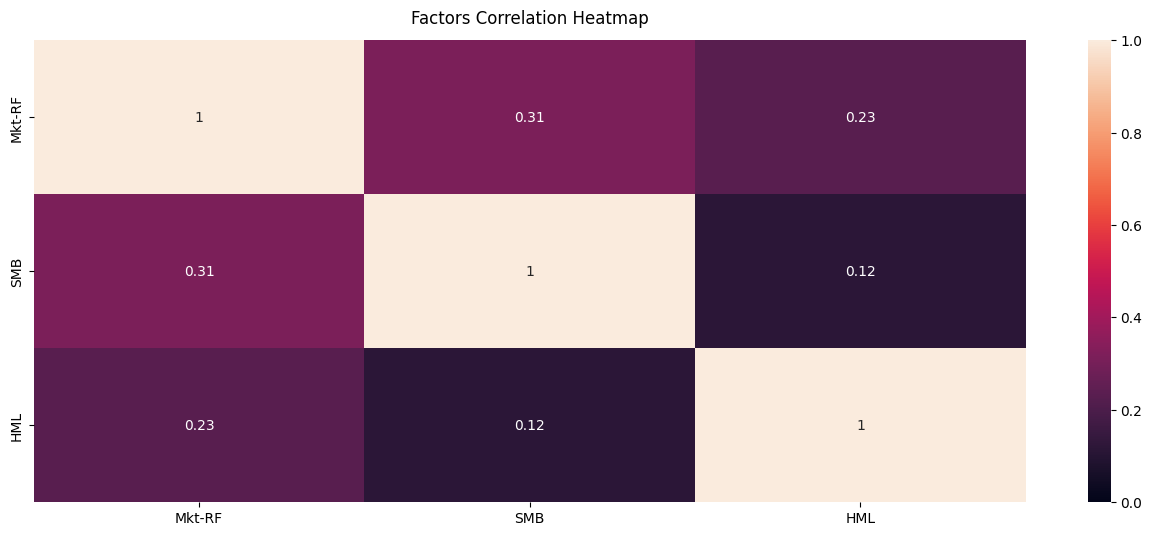

In [6]:
factor_corr = factors.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(factor_corr, vmin=0, vmax=1, annot=True)
heatmap.set_title('Factors Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

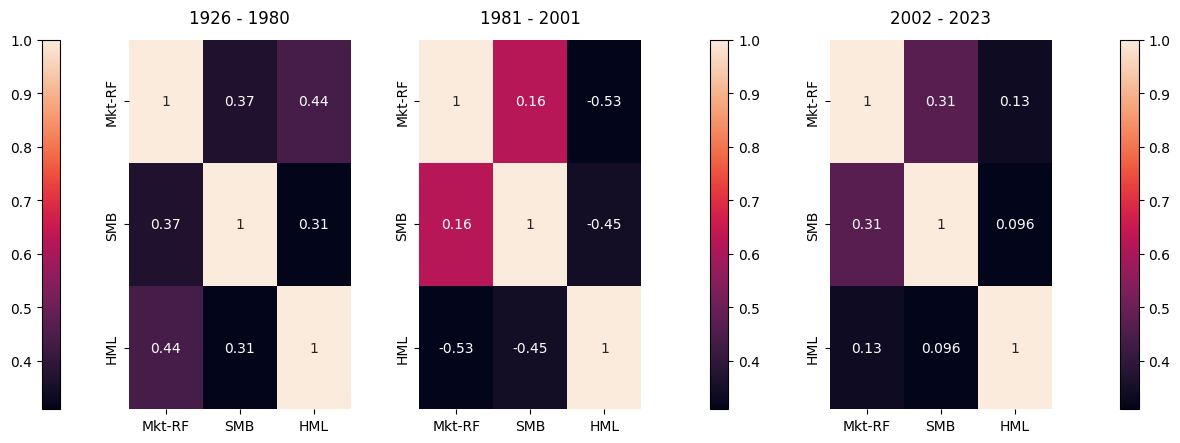

In [7]:
fig, (ax,ax2,ax3) = plt.subplots(ncols=3)

# fig.subplots_adjust(wspace=0.01)
# fig.tight_layout(pad=1)
sns.heatmap(sub_1980.corr(), ax=ax, cbar=False, annot = True).set_title('1926 - 1980', fontdict={'fontsize':12}, pad=12)

fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(sub_2001.corr(), ax=ax2, cbar=False, annot = True).set_title('1981 - 2001', fontdict={'fontsize':12}, pad=12)

fig.colorbar(ax.collections[0],ax=ax2,location="right", use_gridspec=False, pad=0.2)

sns.heatmap(sub_2023.corr(), ax=ax3, cbar=False, annot = True).set_title('2002 - 2023', fontdict={'fontsize':12}, pad=12)
fig.colorbar(ax.collections[0],ax=ax3,location="right", use_gridspec=False, pad=0.2)

fig.set_figwidth(15)
plt.show()

### Answer
Overall, the correlations between the three factors are low and thus the construction method succeeds in its objective. It also succeeds in each subsample. The correlation between market premium and value factor is relatively high(-0.53) in 1981 to 2001. 

## 2.4 Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

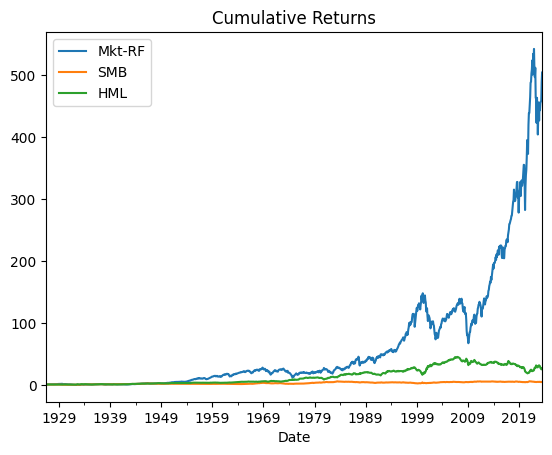

In [8]:
figure = ((factors + 1).cumprod()).plot()
# plt.figure(figsize=(100, 6))
plt.title('Cumulative Returns')
plt.show()

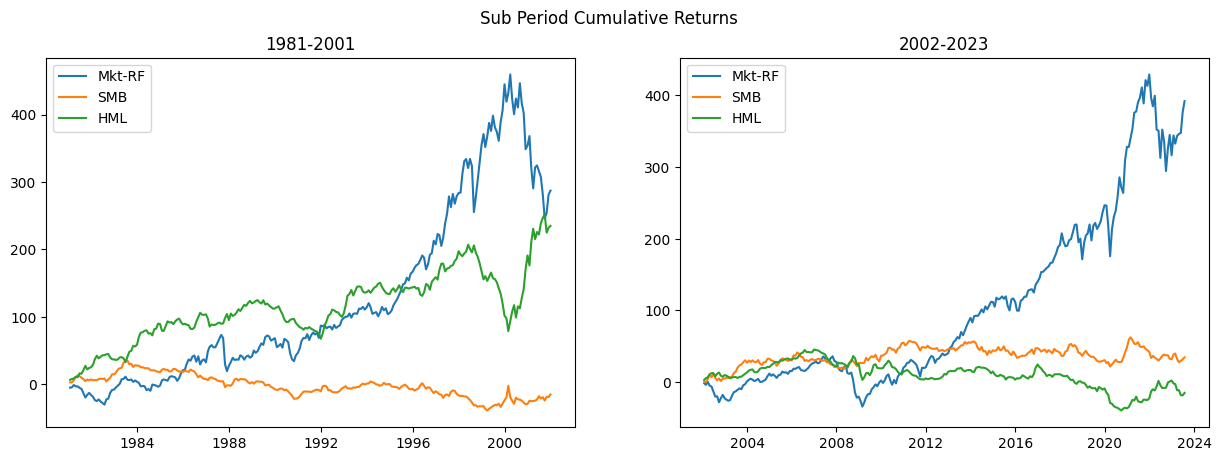

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sub Period Cumulative Returns')
ax1.plot(((sub_2001 + 1).cumprod()*100)-100)
ax2.plot(((sub_2023 + 1).cumprod()*100)-100)

fig.set_figwidth(15)
ax1.legend(sub_2001.columns)
ax2.legend(sub_2023.columns)

ax1.title.set_text('1981-2001')
ax2.title.set_text('2002-2023')

## 2.5 Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

    As the graph showed above, market factor was generally valuable over time, though with some drawdowns in the 2001 tech bubble burst, the 2008 financial crisis and the covid recently. In late 2001, the value factor benefited from the depressed stock prices to post a premium, but contributed barly excess return post that. For the Size factor, it posts near zero or negative returns for the entire period.

    Though all 3 factors still possess some relevant characterisitics, it appears that Factor rotation might be a better strategy in hindsight. The size factor seems our of favor for a long time now and the returns seem correlated to the Market Factor. DFA should also try to explore other factors such as volatility, liquidity, momentum etc. to generate alpha while sticking to their belief of capital markets being efficient.

# Problem 3 CAPM
DFA believes that premia in stocks and stock portfolios is related to the three factors. Let’s test 25 equity portfolios that span a wide range of size and value measures.

- PORTFOLIOS: Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as ri, for n = 1, . . . , 25.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

## 3.1 Summary Statistics. For each portfolio,
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from 1.1.
- Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

### 3.1.1 Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns. 

In [55]:
risk_free = df.drop(['Mkt-RF','SMB','HML'], axis=1)
portfolio = pd.read_excel('/Users/yiningqu/Desktop/dfa_analysis_data.xlsx', sheet_name = 'portfolios (total returns)').set_index('Date')

#how to subtract values
portfolio_ret = portfolio.sub(risk_free.values)
portfolio_excess_ret = portfolio_ret.loc['1981':]
portfolio_excess_ret

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0597,-0.0107,-0.0127,0.0076,0.0206,...,-0.0770,-0.0449,-0.0129,-0.0055,0.0039,-0.0717,-0.0836,-0.0743,-0.0100,0.0095
1981-02-28,-0.0447,-0.0105,0.0014,0.0092,0.0144,-0.0145,0.0051,0.0174,0.0244,0.0279,...,0.0026,0.0147,0.0347,0.0027,0.0272,0.0219,0.0094,-0.0164,0.0204,-0.0169
1981-03-31,0.0607,0.0824,0.0736,0.0777,0.0610,0.0681,0.0715,0.0663,0.0663,0.0632,...,0.0804,0.0557,0.0732,0.0619,0.0649,0.0174,0.0199,-0.0089,0.0222,0.0696
1981-04-30,0.0181,0.0359,0.0246,0.0365,0.0441,0.0060,0.0247,0.0266,0.0268,0.0294,...,-0.0108,-0.0191,-0.0060,-0.0078,0.0063,-0.0383,-0.0535,-0.0380,0.0104,-0.0404
1981-05-31,0.0382,0.0378,0.0324,0.0134,0.0168,0.0505,0.0103,0.0169,-0.0086,0.0136,...,0.0240,0.0102,0.0076,-0.0008,0.0220,0.0043,-0.0328,-0.0314,0.0267,-0.0060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.1092,-0.0669,-0.0732,-0.0757,-0.1015,-0.0348,-0.0356,-0.0397,-0.0539,-0.1072,...,0.0089,-0.0072,-0.0242,-0.0418,-0.1258,0.0786,0.0275,0.0064,-0.0413,-0.0700
2023-04-30,0.0222,-0.0239,-0.0191,-0.0308,-0.0452,-0.0328,-0.0009,-0.0357,-0.0327,-0.0326,...,-0.0225,-0.0257,-0.0072,-0.0198,-0.0011,0.0081,0.0098,0.0084,0.0202,0.0325
2023-05-31,0.0443,0.0214,0.0287,-0.0146,-0.0219,0.0078,0.0306,0.0172,0.0162,-0.0530,...,-0.0020,-0.0268,-0.0435,-0.0350,-0.0678,0.0521,-0.0157,-0.0544,-0.0765,-0.0506


### 3.1.2 Calculate the (annualized) univariate statistics from 1.1.

In [11]:
performance_summary = performance_summary(portfolio_ret, period = 12)
portfolio_summary = performance_summary[['Mean','Volatility','Sharpe Ratio','VaR (0.05)']]
portfolio_summary

,Mean,Volatility,Sharpe Ratio,VaR (0.05)
SMALL LoBM,0.0086,0.2726,0.0316,-0.1211
ME1 BM2,0.0918,0.2357,0.3894,-0.0957
ME1 BM3,0.0927,0.1979,0.4682,-0.0858
ME1 BM4,0.1174,0.1924,0.6101,-0.0764
SMALL HiBM,0.1294,0.2083,0.6214,-0.0886
ME2 BM1,0.0599,0.2448,0.2447,-0.1040
ME2 BM2,0.1019,0.2042,0.4988,-0.0849
ME2 BM3,0.1071,0.1848,0.5795,-0.0791
ME2 BM4,0.1089,0.1807,0.6026,-0.0774
ME2 BM5,0.1163,0.2138,0.5437,-0.0967


### 3.1.3 Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics? 

In [12]:
portfolio_summary.corr()

,Mean,Volatility,Sharpe Ratio,VaR (0.05)
Mean,1.0000,-0.4311,0.9188,0.5095
Volatility,-0.4311,1.0000,-0.7338,-0.9573
Sharpe Ratio,0.9188,-0.7338,1.0000,0.7798
VaR (0.05),0.5095,-0.9573,0.7798,1.0000


The difference in mean excess returns of the portfolios can not be explained by their volatilities and VaR(0.05) because the correlation is relatively small (-0.43 for volatility and 0.51 for VaR)

Based on the scatter plots below, we do not get a clear indication if the differences in the mean excess returns are explained by differences in either their VaR or their Volatility. Given VaR is a factor of portfolios volatility, more the volatility deeper the VaR threshold, the return differences might be explained slightly by the differences in the volatility. A linear pattern can be observed between volatility and mean excess returns to support the previous arguments, but the evidence is not very concrete from the plots below.

Text(0, 0.5, 'Mean Excess Returns')

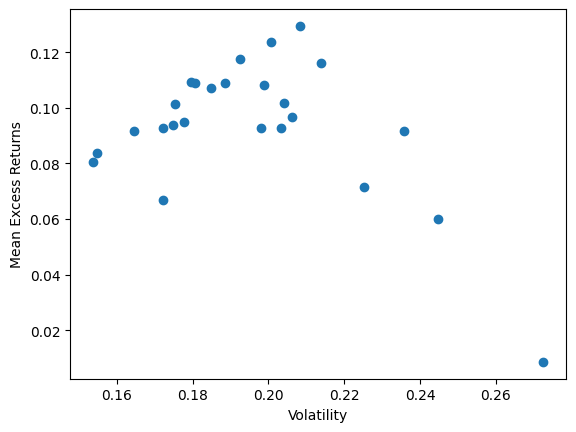

In [17]:
plt.scatter(portfolio_summary.loc[:,['Volatility']],portfolio_summary.loc[:,['Mean']])
plt.xlabel("Volatility")
plt.ylabel("Mean Excess Returns")

Text(0, 0.5, 'Mean Excess Returns')

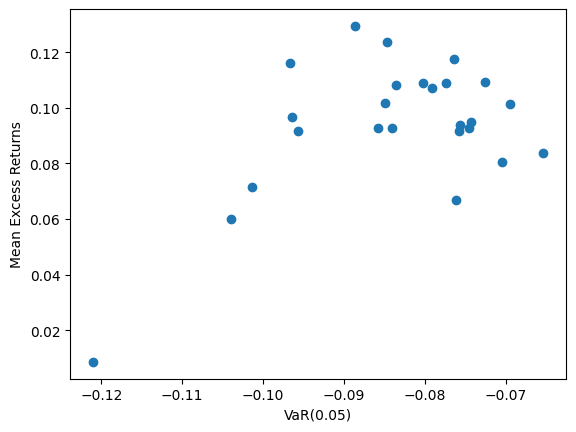

In [18]:
plt.scatter( portfolio_summary.loc[:,['VaR (0.05)']],portfolio_summary.loc[:,['Mean']])
plt.xlabel("VaR(0.05)")
plt.ylabel("Mean Excess Returns")

## 3.2 CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, r ̃i , its mean is proportional to the mean excess mim
return of the market, r ̃ , where the proporitonality is the regression beta of r ̃i on r ̃m .

(a) For each of the n = 25 test portfolios, run the CAPM time-series regression:

So you are running 25 separate regressions, each using the T-sized sample of time-series data.

(b) Report the estimated βi,m, Treynor Ratio, αi, and Information Ratio for each of the n regressions.

(c) If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?


### 3.2.1  For each of the n = 25 test portfolios, run the CAPM time-series regression:

In [47]:
# def time_series_regression(portfolio, factors, FF3F = False, resid = False, scale =12):
#     '''
#     Input portfolio (columns of funds to be regressed), and factors.
#     This function returns the portfolio columns as index, and regression estimates as columns
#     If factors contain Fama-French 3 Factors, (Size and Value), then includes those betas.
#     If resid = True, then we return the residual of each column in portfolio indexed by time
#     '''
    
#     report = pd.DataFrame(index = portfolio.columns)
#     residual = pd.DataFrame(columns= portfolio.columns)

#     for col in portfolio.columns:
#         fund_ret = portfolio[col]
#         model = sm.OLS(fund_ret, sm.add_constant(factors), missing= 'drop').fit()
#         report.loc[col, 'Alpha'] = model.params['const'] * scale
#         report.loc[col, 'Market Beta'] = model.params[1]
#         if FF3F:
#             report.loc[col, 'Size Beta'] = model.params[2]
#             report.loc[col, 'Value Beta'] = model.params[3]
#         report.loc[col, 'Information Ratio'] = np.sqrt(scale) * model.params['const'] / model.resid.std()
#         report.loc[col, 'Treynor Ratio'] = scale * portfolio[col].mean() / model.params[1]
#         report.loc[col, 'R-Squared'] = model.rsquared
#         report.loc[col, 'Tracking Error'] = (model.resid.std()*np.sqrt(scale))  
#         if resid:
#             residual[col] = model.resid
#     if resid:
#         return residual
#     return report

In [42]:
ts_CAPM = time_series_regression(portfolio_ret, factors.loc['1981':,'Mkt-RF'])
ts_CAPM

,Alpha,Market Beta,Information Ratio,Treynor Ratio,R-Squared,Tracking Error
SMALL LoBM,-0.1018,1.3501,-0.5893,0.0064,0.5984,0.1728
ME1 BM2,-0.0031,1.1603,-0.0207,0.0791,0.5913,0.1507
ME1 BM3,0.0081,1.0340,0.0708,0.0896,0.6660,0.1144
ME1 BM4,0.0383,0.9673,0.3213,0.1214,0.6166,0.1191
SMALL HiBM,0.0486,0.9883,0.3476,0.1310,0.5492,0.1398
ME2 BM1,-0.0492,1.3334,-0.3822,0.0449,0.7239,0.1286
ME2 BM2,0.0095,1.1289,0.0926,0.0902,0.7456,0.1030
ME2 BM3,0.0233,1.0248,0.2520,0.1045,0.7503,0.0923
ME2 BM4,0.0295,0.9704,0.3002,0.1122,0.7036,0.0984
ME2 BM5,0.0255,1.1094,0.2038,0.1048,0.6566,0.1253


### 3.2.2 Report the estimated βi,m, Treynor Ratio, αi, and Information Ratio for each of the n regressions. 

### 3.2.3 If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios? 
- Information Ratio = alpha / std of residual
- Treynor Ratio = (expected return - risk free) / beta

If CAPM were true, we would observe **same** Treynor ratios for all 25 portfolios as the portfolio returns should completely be a function of market returns (SPY). However, as we observe, most portfolios have varying Treynor ratios, indicating towards and high alpha and/or low regression beta. 

The alphas should similarly have been lower (ideally 0) for all portfolios and we should have also seen low absolute magnitude of the residuals, resulting in lower (ideally 0) information ratios. But we observe, that the alphas are still higher than expected and the Information ratios are higher than expected indicating towards presence of other regressors that should be included in the model.

## 3. Cross-sectional Estimation

### 3.3.1 Report the intercept, the regression coefficient, and R-squared of this regression.

In [38]:
#to_frame the mean 
portfolio = portfolio_ret.mean().to_frame('Mean Portfolio excess returns')
cs_CAPM = time_series_regression(portfolio, ts_CAPM['Market Beta'])
cs_CAPM

,Alpha,Market Beta,Information Ratio,Treynor Ratio,R-Squared,Tracking Error
Mean Portfolio excess returns,0.2038,-0.0087,33.8782,-10.8632,0.2728,0.0060


### What would these three statistics be if (CAPM) were true?

    The Beta should be the expected excess returns of the market factor, and the alpha should be close to zero. And the R-squared should be high as well, since the dependent variable is mean returns instead of realized returns.

## 3.4 Broadly speaking, do these results support DFA’s belief in size and value portfolios containing premia unrelated to the CAPM?
    
    Yes. These results show that CAPM is not strictly held, with low Beta, low R-Squared and relatively high Alpha. It means that there should be other factors to explain the excess returns of portfolios. So the size and value factor could contain premia unrelated to the CAPM.


In [52]:
#multiple factor time series regression
def time_series_regression(portfolio, factors, resid = False, scale =12):
    '''
    Input portfolio (columns of funds to be regressed), and factors.
    This function returns the portfolio columns as index, and regression estimates as columns
    Function includes betas for anything included in factors
    If resid = True, then we return the residual of each column in portfolio indexed by time
    '''
    
    report = pd.DataFrame(index = portfolio.columns)
    residual = pd.DataFrame(columns= portfolio.columns)

    for col in portfolio.columns:
        fund_ret = portfolio[col]
        model = sm.OLS(fund_ret, sm.add_constant(factors), missing= 'drop').fit()
        report.loc[col, 'Mean Return'] = scale * fund_ret.mean()
        report.loc[col, 'Sharpe Ratio'] = np.sqrt(scale) * fund_ret.mean() / fund_ret.std()
        report.loc[col, 'Alpha'] = model.params['const'] * scale
        for i, factor in enumerate(factors.columns):
            report.loc[col, f'{factor} Beta'] = model.params[i + 1]
        report.loc[col, 'Information Ratio'] = np.sqrt(scale) * model.params['const'] / model.resid.std()
        report.loc[col, 'Treynor Ratio'] = scale * portfolio[col].mean() / model.params[1]
        report.loc[col, 'R-Squared'] = model.rsquared
        report.loc[col, 'Tracking Error'] = (model.resid.std()*np.sqrt(scale))  
        if resid:
            residual[col] = model.resid
    if resid:
        return residual
    return report

In [53]:
ts_FF3F = time_series_regression(portfolio_ret, factors.loc['1981':])
ts_FF3F

,Mean Return,Sharpe Ratio,Alpha,Mkt-RF Beta,SMB Beta,HML Beta,Information Ratio,Treynor Ratio,R-Squared,Tracking Error
SMALL LoBM,0.0086,0.0316,-0.0859,1.1099,1.3828,-0.2579,-0.9467,0.0078,0.8891,0.0908
ME1 BM2,0.0918,0.3894,0.0023,0.9643,1.3166,-0.0156,0.0323,0.0952,0.9096,0.0709
ME1 BM3,0.0927,0.4682,0.0005,0.9178,1.0489,0.2686,0.0116,0.1010,0.9435,0.0470
ME1 BM4,0.1174,0.6101,0.0221,0.8787,1.0576,0.4725,0.4655,0.1336,0.9389,0.0476
SMALL HiBM,0.1294,0.6214,0.0233,0.9302,1.0620,0.6912,0.3125,0.1391,0.8723,0.0744
ME2 BM1,0.0599,0.2447,-0.0322,1.1388,1.0170,-0.3159,-0.5354,0.0526,0.9398,0.0601
ME2 BM2,0.1019,0.4988,0.0080,1.0115,0.9059,0.1127,0.1598,0.1007,0.9391,0.0504
ME2 BM3,0.1071,0.5795,0.0094,0.9749,0.7138,0.3887,0.1809,0.1098,0.9203,0.0522
ME2 BM4,0.1089,0.6026,0.0081,0.9426,0.7402,0.5715,0.1788,0.1155,0.9374,0.0452
ME2 BM5,0.1163,0.5437,-0.0061,1.0911,0.9242,0.8288,-0.1311,0.1066,0.9524,0.0466


In [54]:
portfolio = portfolio_ret.mean().to_frame('Mean Portfolio excess returns')
FF3F_cs_CAPM = time_series_regression(portfolio, ts_FF3F[['Mkt-RF Beta','SMB Beta','HML Beta']])
FF3F_cs_CAPM

,Mean Return,Sharpe Ratio,Alpha,Mkt-RF Beta Beta,SMB Beta Beta,HML Beta Beta,Information Ratio,Treynor Ratio,R-Squared,Tracking Error
Mean Portfolio excess returns,0.0940,13.3275,0.1882,-0.0086,0.0000,0.0029,35.8787,-10.9937,0.4471,0.0052
